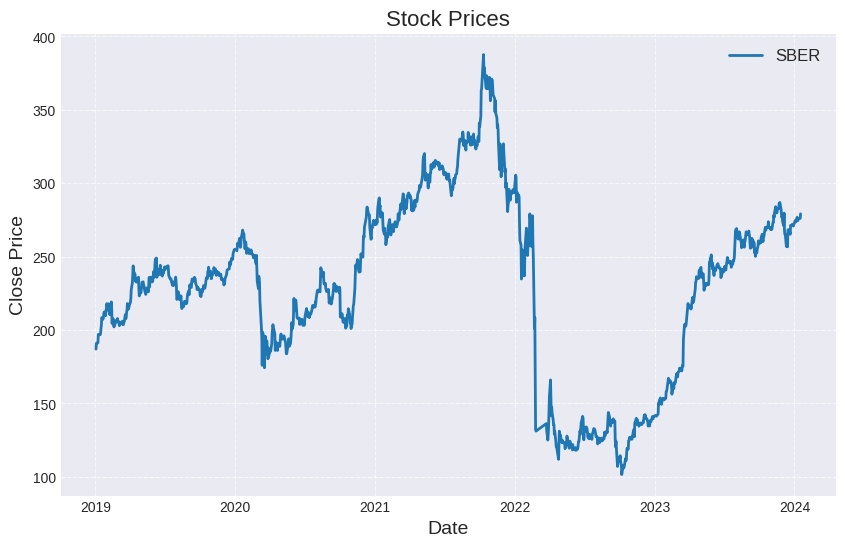

,ticker,per,date,time,open,high,low,close,vol
0,SBER,D,2019-01-03,0,186.37,191.50,186.00,186.99,40105780
1,SBER,D,2019-01-04,0,187.99,190.99,187.77,190.99,32537090
2,SBER,D,2019-01-08,0,191.66,193.18,190.37,191.24,38581950
3,SBER,D,2019-01-09,0,192.71,197.00,192.10,197.00,70633230
4,SBER,D,2019-01-10,0,196.30,197.64,195.03,196.75,56211650
...,...,...,...,...,...,...,...,...,...
1251,SBER,D,2024-01-11,0,274.62,275.97,274.01,275.71,19520470
1252,SBER,D,2024-01-12,0,275.90,276.96,274.77,275.84,17608350
1253,SBER,D,2024-01-15,0,276.30,277.73,275.21,275.96,21283290
1254,SBER,D,2024-01-16,0,276.24,276.45,274.10,276.01,16084140


In [218]:
from stocks_parser import StockParser

stock_parser = StockParser(['SBER'],start_date = '2019-02-01', end_date = '2024-01-17')
stock_parser.parse_stocks()
stock_parser.plot_stock_data()
stock_data = stock_parser.get_stocks_dataframe()
stock_data=stock_data['SBER']
stock_data_no_dublicates = stock_data.drop_duplicates(subset='date', keep='last')
stock_data

In [219]:
import pandas as pd

# Пример данных
data = {'filtered_content': [['Акции Сбербанка', 'в понедельник подорожали на '],
                             ['Другие акции', 'текст еще']],
        'other_column': [1, 2]}

df = pd.DataFrame(data)

# Объединение элементов списка в столбце 'filtered_content'
df['merged_content'] = df['filtered_content'].apply(lambda x: '; '.join(x))

# Удаление столбца 'filtered_content', если нужно
df = df.drop(columns=['filtered_content'])

# Вывод результата
print(df['merged_content'])


0    Акции Сбербанка; в понедельник подорожали на 
1                          Другие акции; текст еще
Name: merged_content, dtype: object


In [220]:
import pandas as pd
import re
def join_lists(row):
    return ' '.join(row)
news_data = pd.read_csv('../SBER_news_in_crashed.csv')
news_data_no_duplicates = news_data.drop_duplicates(subset='date', keep='last')
news_data_no_duplicates['date'] = pd.to_datetime(news_data_no_duplicates['date'])

news_data_no_duplicates

/tmp/ipykernel_4995/2019942218.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data_no_duplicates['date'] = pd.to_datetime(news_data_no_duplicates['date'])


,date,title,content,filtered_content
1,2024-01-17,Сбербанк. Не удалось обновить январские максимумы,"Акции Сбербанка в понедельник подорожали на 0,...",['Акции Сбербанка в понедельник подорожали на ...
2,2024-01-16,"Сбербанк. Сбавили темпы, но краткосрочный трен...","Акции Сбербанка в пятницу подорожали на 0,05%,...","['Акции Сбербанка в пятницу подорожали на 0,05..."
3,2024-01-12,Сбербанк. Пока не расторговались,"Акции Сбербанка в четверг подорожали на 0,44%,...","['Акции Сбербанка в четверг подорожали на 0,44..."
4,2024-01-11,Сбербанк. Может протестировать 200-часовую сре...,"Акции Сбербанка в среду подешевели на 0,29%, д...","['Акции Сбербанка в среду подешевели на 0,29%,..."
7,2024-01-10,Сбербанк. Откат на низких оборотах,"Акции Сбербанка во вторник подешевели на 0,53%...","['Акции Сбербанка во вторник подешевели на 0,5..."
...,...,...,...,...
2438,2019-03-19,Сбербанк. Пробит локальный нисходящий тренд,Итоги торгов\nНа предыдущей торговой сессии ак...,['Итоги торгов\nНа предыдущей торговой сессии ...
2441,2019-03-18,Сбербанк. Остановились на поддержке в месячном...,Итоги торгов\nНа предыдущей торговой сессии ак...,['Итоги торгов\nНа предыдущей торговой сессии ...
2443,2019-03-15,Сбербанк. Сегодня можем протестировать поддерж...,Итоги торгов\nВ предыдущий торговый день акции...,['Итоги торгов\nВ предыдущий торговый день акц...
2445,2019-03-14,Сбербанк. На младших таймфреймах появились при...,Итоги торгов\nВ предыдущий торговый день акции...,['Итоги торгов\nВ предыдущий торговый день акц...


In [221]:
import re

# Define the list of special characters to remove
special_characters = ['[', ']', '\'', '\\xa', '\\n', '•']

# Iterate over each special character and replace it with an empty string
for char in special_characters:
    news_data_no_duplicates['filtered_content'] = news_data_no_duplicates['filtered_content'].str.replace(re.escape(char), ' ')

# Optionally, you can remove any extra spaces resulting from the replacements
news_data_no_duplicates['filtered_content'] = news_data_no_duplicates['filtered_content'].str.strip()
news_data_no_duplicates

/tmp/ipykernel_4995/3599104979.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  news_data_no_duplicates['filtered_content'] = news_data_no_duplicates['filtered_content'].str.replace(re.escape(char), ' ')
/tmp/ipykernel_4995/3599104979.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data_no_duplicates['filtered_content'] = news_data_no_duplicates['filtered_content'].str.replace(re.escape(char), ' ')
/tmp/ipykernel_4995/3599104979.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,date,title,content,filtered_content
1,2024-01-17,Сбербанк. Не удалось обновить январские максимумы,"Акции Сбербанка в понедельник подорожали на 0,...","Акции Сбербанка в понедельник подорожали на 0,..."
2,2024-01-16,"Сбербанк. Сбавили темпы, но краткосрочный трен...","Акции Сбербанка в пятницу подорожали на 0,05%,...","Акции Сбербанка в пятницу подорожали на 0,05%,..."
3,2024-01-12,Сбербанк. Пока не расторговались,"Акции Сбербанка в четверг подорожали на 0,44%,...","Акции Сбербанка в четверг подорожали на 0,44%,..."
4,2024-01-11,Сбербанк. Может протестировать 200-часовую сре...,"Акции Сбербанка в среду подешевели на 0,29%, д...","Акции Сбербанка в среду подешевели на 0,29%, д..."
7,2024-01-10,Сбербанк. Откат на низких оборотах,"Акции Сбербанка во вторник подешевели на 0,53%...","Акции Сбербанка во вторник подешевели на 0,53%..."
...,...,...,...,...
2438,2019-03-19,Сбербанк. Пробит локальный нисходящий тренд,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии акц...
2441,2019-03-18,Сбербанк. Остановились на поддержке в месячном...,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии акц...
2443,2019-03-15,Сбербанк. Сегодня можем протестировать поддерж...,Итоги торгов\nВ предыдущий торговый день акции...,Итоги торгов В предыдущий торговый день акции ...
2445,2019-03-14,Сбербанк. На младших таймфреймах появились при...,Итоги торгов\nВ предыдущий торговый день акции...,Итоги торгов В предыдущий торговый день акции ...


In [222]:
import pandas as pd

# Пример данных
data = {'filtered_content': [['Акции Сбербанка', 'в\\xa понедельник подорожали на '],
                             ['Другие акции', 'текст с [спецсимволами]']],
        'other_column': [1, 2]}

df = pd.DataFrame(data)

# Удаление спецсимволов из столбца 'filtered_content'
df['filtered_content'] = df['filtered_content'].apply(lambda x: [re.sub(r'[\[\]\'\\xa\\n•]', '', item) for item in x])

# Вывод результата
print(df['filtered_content'])


0    [Акции Сбербанка, в понедельник подорожали на ]
1              [Другие акции, текст с спецсимволами]
Name: filtered_content, dtype: object


In [223]:
merged_df = pd.merge(stock_data_no_dublicates,news_data_no_duplicates, on='date', how='left')
merged_df

,ticker,per,date,time,open,high,low,close,vol,title,content,filtered_content
0,SBER,D,2019-01-03,0,186.37,191.50,186.00,186.99,40105780,NaN,NaN,NaN
1,SBER,D,2019-01-04,0,187.99,190.99,187.77,190.99,32537090,NaN,NaN,NaN
2,SBER,D,2019-01-08,0,191.66,193.18,190.37,191.24,38581950,NaN,NaN,NaN
3,SBER,D,2019-01-09,0,192.71,197.00,192.10,197.00,70633230,NaN,NaN,NaN
4,SBER,D,2019-01-10,0,196.30,197.64,195.03,196.75,56211650,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1251,SBER,D,2024-01-11,0,274.62,275.97,274.01,275.71,19520470,Сбербанк. Может протестировать 200-часовую сре...,"Акции Сбербанка в среду подешевели на 0,29%, д...","Акции Сбербанка в среду подешевели на 0,29%, д..."
1252,SBER,D,2024-01-12,0,275.90,276.96,274.77,275.84,17608350,Сбербанк. Пока не расторговались,"Акции Сбербанка в четверг подорожали на 0,44%,...","Акции Сбербанка в четверг подорожали на 0,44%,..."
1253,SBER,D,2024-01-15,0,276.30,277.73,275.21,275.96,21283290,NaN,NaN,NaN
1254,SBER,D,2024-01-16,0,276.24,276.45,274.10,276.01,16084140,"Сбербанк. Сбавили темпы, но краткосрочный трен...","Акции Сбербанка в пятницу подорожали на 0,05%,...","Акции Сбербанка в пятницу подорожали на 0,05%,..."


In [224]:
merged_df['rolling_mean_30'] = merged_df['close'].rolling(window=30).mean()

# Calculate the daily increments
merged_df['daily_increment'] = merged_df['close'].diff()
merged_df

,ticker,per,date,time,open,high,low,close,vol,title,content,filtered_content,rolling_mean_30,daily_increment
0,SBER,D,2019-01-03,0,186.37,191.50,186.00,186.99,40105780,NaN,NaN,NaN,NaN,NaN
1,SBER,D,2019-01-04,0,187.99,190.99,187.77,190.99,32537090,NaN,NaN,NaN,NaN,4.00
2,SBER,D,2019-01-08,0,191.66,193.18,190.37,191.24,38581950,NaN,NaN,NaN,NaN,0.25
3,SBER,D,2019-01-09,0,192.71,197.00,192.10,197.00,70633230,NaN,NaN,NaN,NaN,5.76
4,SBER,D,2019-01-10,0,196.30,197.64,195.03,196.75,56211650,NaN,NaN,NaN,NaN,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,SBER,D,2024-01-11,0,274.62,275.97,274.01,275.71,19520470,Сбербанк. Может протестировать 200-часовую сре...,"Акции Сбербанка в среду подешевели на 0,29%, д...","Акции Сбербанка в среду подешевели на 0,29%, д...",269.883667,1.22
1252,SBER,D,2024-01-12,0,275.90,276.96,274.77,275.84,17608350,Сбербанк. Пока не расторговались,"Акции Сбербанка в четверг подорожали на 0,44%,...","Акции Сбербанка в четверг подорожали на 0,44%,...",269.851667,0.13
1253,SBER,D,2024-01-15,0,276.30,277.73,275.21,275.96,21283290,NaN,NaN,NaN,269.800333,0.12
1254,SBER,D,2024-01-16,0,276.24,276.45,274.10,276.01,16084140,"Сбербанк. Сбавили темпы, но краткосрочный трен...","Акции Сбербанка в пятницу подорожали на 0,05%,...","Акции Сбербанка в пятницу подорожали на 0,05%,...",269.868333,0.05


In [225]:
from LSTM import StockLSTM, StockPredictor

In [226]:
from LSTM import StockLSTM, StockPredictor
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


predictor = StockPredictor()

train_data, test_data = train_test_split(merged_df, test_size=0.5, shuffle=False)
train_data.dropna(subset='rolling_mean_30',inplace=True)
train_data.dropna(subset='daily_increment',inplace=True)
test_data.dropna(subset='rolling_mean_30',inplace=True)
test_data.dropna(subset='daily_increment',inplace=True)


Epoch  10 MSE:  0.07062575221061707
Epoch  20 MSE:  0.016670135781168938
Epoch  30 MSE:  0.012456520460546017
Epoch  40 MSE:  0.010063269175589085
Epoch  50 MSE:  0.008744603954255581
Epoch  60 MSE:  0.00750207481905818
Epoch  70 MSE:  0.006720444653183222
Epoch  80 MSE:  0.005991440266370773
Epoch  90 MSE:  0.005443486850708723
Epoch  100 MSE:  0.0051369559951126575
Epoch  110 MSE:  0.004963838495314121
Epoch  120 MSE:  0.00481799291446805
Epoch  130 MSE:  0.004681749735027552
Epoch  140 MSE:  0.004560376983135939
Epoch  150 MSE:  0.0044477758929133415
Epoch  160 MSE:  0.00434223935008049
Epoch  170 MSE:  0.004243203904479742
Epoch  180 MSE:  0.0041499328799545765
Epoch  190 MSE:  0.004061685875058174
Epoch  200 MSE:  0.0039777085185050964
Epoch  210 MSE:  0.0038971470203250647
Epoch  220 MSE:  0.003819073550403118
Epoch  230 MSE:  0.003742595436051488
Epoch  240 MSE:  0.003667006269097328
Epoch  250 MSE:  0.0035919498186558485
Epoch  260 MSE:  0.0035175569355487823
Epoch  270 MSE:  0

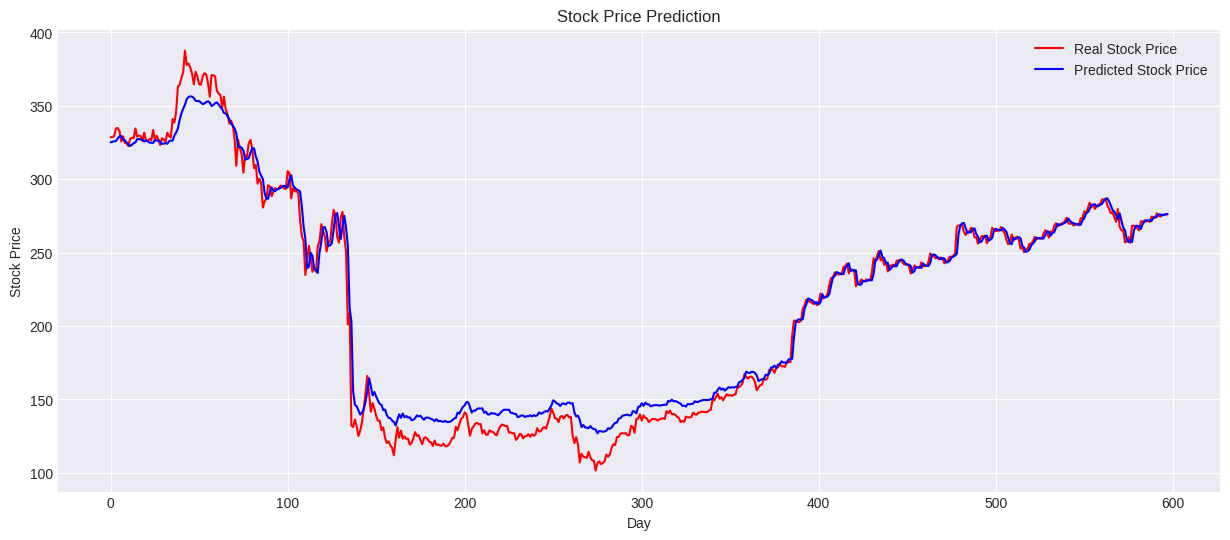

In [227]:

# # Load and train the model
predictor.load_data(torch.from_numpy(train_data['close'].to_numpy()))
predictor.train_model()

# Predict and evaluate
predictor.predict( torch.from_numpy(test_data['close'].to_numpy()))
predictor.calculate_rmse()
predictor.plot_results()
predicted_close, original_close = predictor.get_predictions_and_originals()

Epoch  10 MSE:  0.018547585234045982
Epoch  20 MSE:  0.002681440906599164
Epoch  30 MSE:  0.0016631773905828595
Epoch  40 MSE:  0.0008389458525925875
Epoch  50 MSE:  0.0004362299805507064
Epoch  60 MSE:  0.00023937333025969565
Epoch  70 MSE:  0.00016517311451025307
Epoch  80 MSE:  0.00014563284639734775
Epoch  90 MSE:  0.00013340957229956985
Epoch  100 MSE:  0.00012447404151316732
Epoch  110 MSE:  0.00011999833077425137
Epoch  120 MSE:  0.00011599882418522611
Epoch  130 MSE:  0.00011258407175773755
Epoch  140 MSE:  0.000109525652078446
Epoch  150 MSE:  0.00010661528358468786
Epoch  160 MSE:  0.00010381433094153181
Epoch  170 MSE:  0.00010110277798958123
Epoch  180 MSE:  9.846928878687322e-05
Epoch  190 MSE:  9.590890840627253e-05
Epoch  200 MSE:  9.342013800051063e-05
Epoch  210 MSE:  9.100211173063144e-05
Epoch  220 MSE:  8.865390555001795e-05
Epoch  230 MSE:  8.637474093120545e-05
Epoch  240 MSE:  8.416381751885638e-05
Epoch  250 MSE:  8.202723984140903e-05
Epoch  260 MSE:  0.0001022

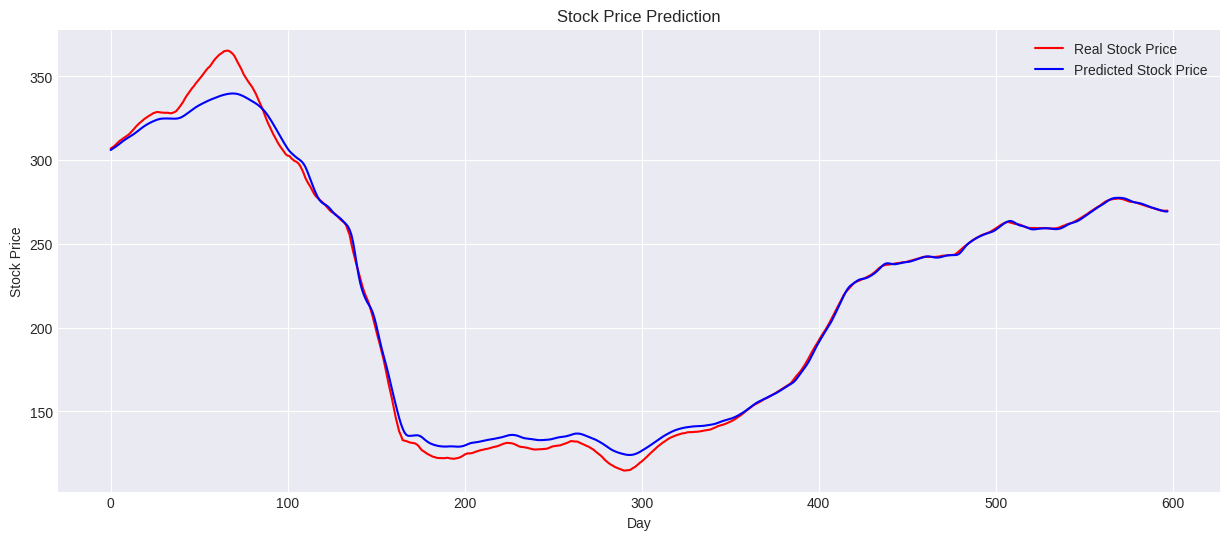

In [228]:

# # Load and train the model
predictor.load_data(torch.from_numpy(train_data['rolling_mean_30'].to_numpy()))
predictor.train_model()

# Predict and evaluate
predictor.predict( torch.from_numpy(test_data['rolling_mean_30'].to_numpy()))
predictor.calculate_rmse()
predictor.plot_results()
predicted_mean, original_mean = predictor.get_predictions_and_originals()

Epoch  10 MSE:  0.039420582354068756
Epoch  20 MSE:  0.039155349135398865
Epoch  30 MSE:  0.038923077285289764
Epoch  40 MSE:  0.03884812071919441
Epoch  50 MSE:  0.03882087022066116
Epoch  60 MSE:  0.03880946710705757
Epoch  70 MSE:  0.038802679628133774
Epoch  80 MSE:  0.038796212524175644
Epoch  90 MSE:  0.03878679499030113
Epoch  100 MSE:  0.038768477737903595
Epoch  110 MSE:  0.03872782737016678
Epoch  120 MSE:  0.03862825036048889
Epoch  130 MSE:  0.038261499255895615
Epoch  140 MSE:  0.037041522562503815
Epoch  150 MSE:  0.03570681810379028
Epoch  160 MSE:  0.03465977683663368
Epoch  170 MSE:  0.03378952294588089
Epoch  180 MSE:  0.0331854410469532
Epoch  190 MSE:  0.03190760314464569
Epoch  200 MSE:  0.031854599714279175
Epoch  210 MSE:  0.030893389135599136
Epoch  220 MSE:  0.029916005209088326
Epoch  230 MSE:  0.031493041664361954
Epoch  240 MSE:  0.03025621362030506
Epoch  250 MSE:  0.029620898887515068
Epoch  260 MSE:  0.028656508773565292
Epoch  270 MSE:  0.028525996953248

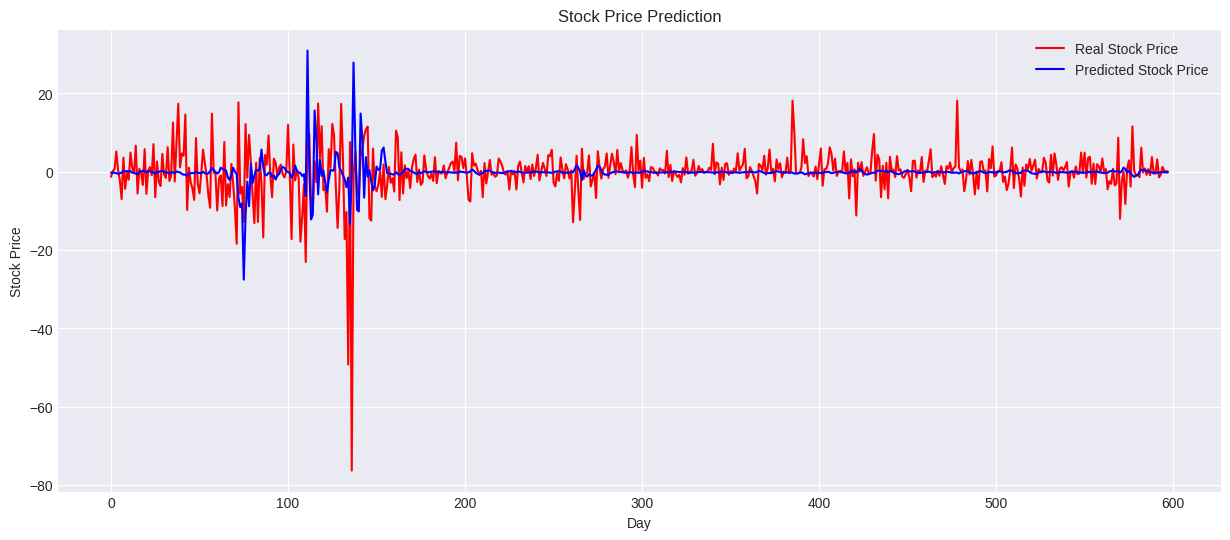

In [229]:

# # Load and train the model
predictor.load_data(torch.from_numpy(train_data['daily_increment'].to_numpy()))
predictor.train_model()

# Predict and evaluate
predictor.predict( torch.from_numpy(test_data['daily_increment'].to_numpy()))
predictor.calculate_rmse()
predictor.plot_results()
predicted_increment, original_increment = predictor.get_predictions_and_originals()

In [230]:
test_data_from_30th = test_data.iloc[29:len(test_data)-1]
test_data_from_30th

,ticker,per,date,time,open,high,low,close,vol,title,content,filtered_content,rolling_mean_30,daily_increment
657,SBER,D,2021-08-12,0,330.00,330.64,327.30,328.57,20985080,Сбербанк. Покупатели не отступают,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,306.932333,-1.33
658,SBER,D,2021-08-13,0,328.60,330.27,327.31,328.68,18758270,Сбербанк. Разворотная модель на дневном графике,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,307.642000,0.11
659,SBER,D,2021-08-16,0,327.56,330.52,327.13,329.36,23916510,Сбербанк. Пробой поддержки подтвердит негативн...,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,308.387333,0.68
660,SBER,D,2021-08-17,0,329.00,335.70,328.55,334.50,42463620,Сбербанк. Не хочет падать,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,309.426000,5.14
661,SBER,D,2021-08-18,0,336.05,338.99,333.26,334.90,36270350,Сбербанк. Закрепиться выше 340 без коррекции б...,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,310.454000,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,SBER,D,2024-01-10,0,275.30,276.16,273.64,274.49,20618950,Сбербанк. Откат на низких оборотах,"Акции Сбербанка во вторник подешевели на 0,53%...","Акции Сбербанка во вторник подешевели на 0,53%...",270.023667,-0.79
1251,SBER,D,2024-01-11,0,274.62,275.97,274.01,275.71,19520470,Сбербанк. Может протестировать 200-часовую сре...,"Акции Сбербанка в среду подешевели на 0,29%, д...","Акции Сбербанка в среду подешевели на 0,29%, д...",269.883667,1.22
1252,SBER,D,2024-01-12,0,275.90,276.96,274.77,275.84,17608350,Сбербанк. Пока не расторговались,"Акции Сбербанка в четверг подорожали на 0,44%,...","Акции Сбербанка в четверг подорожали на 0,44%,...",269.851667,0.13
1253,SBER,D,2024-01-15,0,276.30,277.73,275.21,275.96,21283290,NaN,NaN,NaN,269.800333,0.12


In [231]:
test_data_from_30th

,ticker,per,date,time,open,high,low,close,vol,title,content,filtered_content,rolling_mean_30,daily_increment
657,SBER,D,2021-08-12,0,330.00,330.64,327.30,328.57,20985080,Сбербанк. Покупатели не отступают,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,306.932333,-1.33
658,SBER,D,2021-08-13,0,328.60,330.27,327.31,328.68,18758270,Сбербанк. Разворотная модель на дневном графике,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,307.642000,0.11
659,SBER,D,2021-08-16,0,327.56,330.52,327.13,329.36,23916510,Сбербанк. Пробой поддержки подтвердит негативн...,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,308.387333,0.68
660,SBER,D,2021-08-17,0,329.00,335.70,328.55,334.50,42463620,Сбербанк. Не хочет падать,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,309.426000,5.14
661,SBER,D,2021-08-18,0,336.05,338.99,333.26,334.90,36270350,Сбербанк. Закрепиться выше 340 без коррекции б...,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,310.454000,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,SBER,D,2024-01-10,0,275.30,276.16,273.64,274.49,20618950,Сбербанк. Откат на низких оборотах,"Акции Сбербанка во вторник подешевели на 0,53%...","Акции Сбербанка во вторник подешевели на 0,53%...",270.023667,-0.79
1251,SBER,D,2024-01-11,0,274.62,275.97,274.01,275.71,19520470,Сбербанк. Может протестировать 200-часовую сре...,"Акции Сбербанка в среду подешевели на 0,29%, д...","Акции Сбербанка в среду подешевели на 0,29%, д...",269.883667,1.22
1252,SBER,D,2024-01-12,0,275.90,276.96,274.77,275.84,17608350,Сбербанк. Пока не расторговались,"Акции Сбербанка в четверг подорожали на 0,44%,...","Акции Сбербанка в четверг подорожали на 0,44%,...",269.851667,0.13
1253,SBER,D,2024-01-15,0,276.30,277.73,275.21,275.96,21283290,NaN,NaN,NaN,269.800333,0.12


In [232]:
original_close

array([[328.56999847],
       [328.67999588],
       [329.36000198],
       [334.50000412],
       [334.90000259],
       [332.69000015],
       [325.66999649],
       [329.21999817],
       [324.82999969],
       [324.56999634],
       [322.53999756],
       [327.4100029 ],
       [328.27999741],
       [327.94000305],
       [334.57000168],
       [329.00000336],
       [329.70999847],
       [329.37000412],
       [325.95999756],
       [331.69999741],
       [326.00999954],
       [326.24999863],
       [327.4100029 ],
       [326.48000427],
       [333.51000137],
       [326.99000015],
       [329.56000122],
       [326.92000259],
       [323.25000137],
       [327.79999924],
       [327.01999786],
       [325.43999954],
       [331.68000183],
       [329.29999786],
       [328.43000336],
       [340.98999893],
       [338.48000198],
       [345.85000214],
       [363.20000336],
       [364.27999924],
       [368.93000107],
       [373.0100029 ],
       [387.59999725],
       [377

In [233]:
predicted_close

array([[325.07474],
       [325.60132],
       [325.72595],
       [325.9822 ],
       [327.73605],
       [329.17984],
       [329.35992],
       [327.1381 ],
       [326.469  ],
       [325.00015],
       [323.87738],
       [322.61002],
       [323.42584],
       [324.5185 ],
       [325.0781 ],
       [327.32846],
       [327.30023],
       [327.06793],
       [326.81937],
       [325.60886],
       [326.5031 ],
       [325.6599 ],
       [324.89597],
       [324.84283],
       [324.63333],
       [326.64722],
       [326.24133],
       [326.3354 ],
       [325.68686],
       [323.97583],
       [324.25107],
       [324.5116 ],
       [324.1378 ],
       [325.76755],
       [326.34674],
       [326.21884],
       [329.71396],
       [331.73486],
       [334.5878 ],
       [340.4605 ],
       [344.81927],
       [348.08212],
       [350.70828],
       [354.547  ],
       [355.977  ],
       [356.43015],
       [356.2204 ],
       [355.29254],
       [353.33157],
       [353.2394 ],


In [234]:
# Assuming test_data_from_30th is your DataFrame and predicted_close is your Series
test_data_from_30th['predicted_close'] = predicted_close
test_data_from_30th['predicted_mean'] = predicted_mean
test_data_from_30th['predicted_increment'] = predicted_increment
test_data_from_30th

/tmp/ipykernel_4995/610521976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_from_30th['predicted_close'] = predicted_close
/tmp/ipykernel_4995/610521976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_from_30th['predicted_mean'] = predicted_mean
/tmp/ipykernel_4995/610521976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,ticker,per,date,time,open,high,low,close,vol,title,content,filtered_content,rolling_mean_30,daily_increment,predicted_close,predicted_mean,predicted_increment
657,SBER,D,2021-08-12,0,330.00,330.64,327.30,328.57,20985080,Сбербанк. Покупатели не отступают,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,306.932333,-1.33,325.074738,306.050690,-0.245024
658,SBER,D,2021-08-13,0,328.60,330.27,327.31,328.68,18758270,Сбербанк. Разворотная модель на дневном графике,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,307.642000,0.11,325.601318,306.729980,-0.232362
659,SBER,D,2021-08-16,0,327.56,330.52,327.13,329.36,23916510,Сбербанк. Пробой поддержки подтвердит негативн...,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,308.387333,0.68,325.725952,307.443756,-0.315060
660,SBER,D,2021-08-17,0,329.00,335.70,328.55,334.50,42463620,Сбербанк. Не хочет падать,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,309.426000,5.14,325.982208,308.165070,-0.398549
661,SBER,D,2021-08-18,0,336.05,338.99,333.26,334.90,36270350,Сбербанк. Закрепиться выше 340 без коррекции б...,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,310.454000,0.40,327.736053,308.936310,-0.600412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,SBER,D,2024-01-10,0,275.30,276.16,273.64,274.49,20618950,Сбербанк. Откат на низких оборотах,"Акции Сбербанка во вторник подешевели на 0,53%...","Акции Сбербанка во вторник подешевели на 0,53%...",270.023667,-0.79,276.019531,270.134552,-0.111814
1251,SBER,D,2024-01-11,0,274.62,275.97,274.01,275.71,19520470,Сбербанк. Может протестировать 200-часовую сре...,"Акции Сбербанка в среду подешевели на 0,29%, д...","Акции Сбербанка в среду подешевели на 0,29%, д...",269.883667,1.22,275.354034,269.781555,-0.136168
1252,SBER,D,2024-01-12,0,275.90,276.96,274.77,275.84,17608350,Сбербанк. Пока не расторговались,"Акции Сбербанка в четверг подорожали на 0,44%,...","Акции Сбербанка в четверг подорожали на 0,44%,...",269.851667,0.13,275.726471,269.509003,-0.149012
1253,SBER,D,2024-01-15,0,276.30,277.73,275.21,275.96,21283290,NaN,NaN,NaN,269.800333,0.12,276.053955,269.370575,-0.171761


In [235]:
test_data_from_30th.dropna(subset='filtered_content',inplace=True)
test_data_from_30th

/tmp/ipykernel_4995/657160918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_from_30th.dropna(subset='filtered_content',inplace=True)


,ticker,per,date,time,open,high,low,close,vol,title,content,filtered_content,rolling_mean_30,daily_increment,predicted_close,predicted_mean,predicted_increment
657,SBER,D,2021-08-12,0,330.00,330.64,327.30,328.57,20985080,Сбербанк. Покупатели не отступают,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,306.932333,-1.33,325.074738,306.050690,-0.245024
658,SBER,D,2021-08-13,0,328.60,330.27,327.31,328.68,18758270,Сбербанк. Разворотная модель на дневном графике,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,307.642000,0.11,325.601318,306.729980,-0.232362
659,SBER,D,2021-08-16,0,327.56,330.52,327.13,329.36,23916510,Сбербанк. Пробой поддержки подтвердит негативн...,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,308.387333,0.68,325.725952,307.443756,-0.315060
660,SBER,D,2021-08-17,0,329.00,335.70,328.55,334.50,42463620,Сбербанк. Не хочет падать,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,309.426000,5.14,325.982208,308.165070,-0.398549
661,SBER,D,2021-08-18,0,336.05,338.99,333.26,334.90,36270350,Сбербанк. Закрепиться выше 340 без коррекции б...,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии 0ак...,310.454000,0.40,327.736053,308.936310,-0.600412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,SBER,D,2024-01-09,0,276.94,278.00,274.71,275.28,20263120,Сбербанк. Ориентиры смещаются к 280,"Акции Сбербанка в понедельник подорожали на 1,...","Акции Сбербанка в понедельник подорожали на 1,...",270.285000,-1.48,276.023376,270.501740,-0.257286
1250,SBER,D,2024-01-10,0,275.30,276.16,273.64,274.49,20618950,Сбербанк. Откат на низких оборотах,"Акции Сбербанка во вторник подешевели на 0,53%...","Акции Сбербанка во вторник подешевели на 0,53%...",270.023667,-0.79,276.019531,270.134552,-0.111814
1251,SBER,D,2024-01-11,0,274.62,275.97,274.01,275.71,19520470,Сбербанк. Может протестировать 200-часовую сре...,"Акции Сбербанка в среду подешевели на 0,29%, д...","Акции Сбербанка в среду подешевели на 0,29%, д...",269.883667,1.22,275.354034,269.781555,-0.136168
1252,SBER,D,2024-01-12,0,275.90,276.96,274.77,275.84,17608350,Сбербанк. Пока не расторговались,"Акции Сбербанка в четверг подорожали на 0,44%,...","Акции Сбербанка в четверг подорожали на 0,44%,...",269.851667,0.13,275.726471,269.509003,-0.149012


In [236]:
# from sentiment_analyzer import NewsSentimentAnalyzer
# import pandas as pd

# new_res_df = pd.DataFrame()
# k = 0

# for i in range(0, len(test_data_from_30th['filtered_content']), 10):
#     # Take 10 rows at a time
#     chunk = list(test_data_from_30th['filtered_content'])[i:i+10]
#     # print(chunk)
#     analyzer = NewsSentimentAnalyzer(chunk)
#     analyzer.analyze_sentiment()
#     result_df = analyzer.get_sentiment_dataframe()
#     new_res_df = pd.concat([new_res_df, result_df], ignore_index=True)

#     k += 1
#     print("Выполнено: ", k)

# # Display the final result_df after processing all chun
# result_df


In [237]:
new_res_df = pd.read_csv('SBER with sentiments.csv')
new_res_df

,Headline,En Headline,Positive,Negative,Neutral,real_score
0,Итоги торгов На предыдущей торговой сессии 0ак...,The outcome of the tender at the previous trad...,0.570269,0.079627,0.350104,0.490642
1,Итоги торгов На предыдущей торговой сессии 0ак...,The outcome of the bidding at the previous tra...,0.258811,0.589558,0.151630,-0.330747
2,Итоги торгов На предыдущей торговой сессии 0ак...,The outcome of the tender at the previous trad...,0.243453,0.325912,0.430635,-0.082459
3,Итоги торгов На предыдущей торговой сессии 0ак...,The outcome of the tender at the previous trad...,0.100185,0.621478,0.278337,-0.521294
4,Итоги торгов На предыдущей торговой сессии 0ак...,The outcome of the bidding at the previous tra...,0.733777,0.110137,0.156086,0.623641
...,...,...,...,...,...,...
587,"Акции Сбербанка в пятницу подешевели на 0,34%,...","On Friday, Sberbank's stock was reduced by 0.3...",0.007579,0.973308,0.019113,-0.965729
588,"Акции Сбербанка в понедельник подорожали на 1,...","On Monday, Sberbank's stock grew by 1.15 per c...",0.937770,0.021367,0.040864,0.916403
589,"Акции Сбербанка во вторник подешевели на 0,53%...","On Tuesday, Sberbank's stock was reduced by 0....",0.006764,0.974892,0.018344,-0.968128
590,"Акции Сбербанка в среду подешевели на 0,29%, д...","Sberbank's stock on Wednesday is 0.29%, up to ...",0.133026,0.839245,0.027729,-0.706219


In [238]:
# new_res_df.to_csv('SBER with sentiments.csv', index=False)

In [239]:
merged_df

,ticker,per,date,time,open,high,low,close,vol,title,content,filtered_content,rolling_mean_30,daily_increment
0,SBER,D,2019-01-03,0,186.37,191.50,186.00,186.99,40105780,NaN,NaN,NaN,NaN,NaN
1,SBER,D,2019-01-04,0,187.99,190.99,187.77,190.99,32537090,NaN,NaN,NaN,NaN,4.00
2,SBER,D,2019-01-08,0,191.66,193.18,190.37,191.24,38581950,NaN,NaN,NaN,NaN,0.25
3,SBER,D,2019-01-09,0,192.71,197.00,192.10,197.00,70633230,NaN,NaN,NaN,NaN,5.76
4,SBER,D,2019-01-10,0,196.30,197.64,195.03,196.75,56211650,NaN,NaN,NaN,NaN,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,SBER,D,2024-01-11,0,274.62,275.97,274.01,275.71,19520470,Сбербанк. Может протестировать 200-часовую сре...,"Акции Сбербанка в среду подешевели на 0,29%, д...","Акции Сбербанка в среду подешевели на 0,29%, д...",269.883667,1.22
1252,SBER,D,2024-01-12,0,275.90,276.96,274.77,275.84,17608350,Сбербанк. Пока не расторговались,"Акции Сбербанка в четверг подорожали на 0,44%,...","Акции Сбербанка в четверг подорожали на 0,44%,...",269.851667,0.13
1253,SBER,D,2024-01-15,0,276.30,277.73,275.21,275.96,21283290,NaN,NaN,NaN,269.800333,0.12
1254,SBER,D,2024-01-16,0,276.24,276.45,274.10,276.01,16084140,"Сбербанк. Сбавили темпы, но краткосрочный трен...","Акции Сбербанка в пятницу подорожали на 0,05%,...","Акции Сбербанка в пятницу подорожали на 0,05%,...",269.868333,0.05


In [240]:
test_data_from_30th1 = pd.merge(test_data_from_30th, new_res_df, left_on = 'filtered_content', right_on = 'Headline')

In [241]:
test_data_from_30th1

,ticker,per,date,time,open,high,low,close,vol,title,...,daily_increment,predicted_close,predicted_mean,predicted_increment,Headline,En Headline,Positive,Negative,Neutral,real_score
0,SBER,D,2021-08-12,0,330.00,330.64,327.30,328.57,20985080,Сбербанк. Покупатели не отступают,...,-1.33,325.074738,306.050690,-0.245024,Итоги торгов На предыдущей торговой сессии 0ак...,The outcome of the bidding at the previous tra...,0.258811,0.589558,0.151630,-0.330747
1,SBER,D,2021-08-13,0,328.60,330.27,327.31,328.68,18758270,Сбербанк. Разворотная модель на дневном графике,...,0.11,325.601318,306.729980,-0.232362,Итоги торгов На предыдущей торговой сессии 0ак...,The outcome of the tender at the previous trad...,0.243453,0.325912,0.430635,-0.082459
2,SBER,D,2021-08-16,0,327.56,330.52,327.13,329.36,23916510,Сбербанк. Пробой поддержки подтвердит негативн...,...,0.68,325.725952,307.443756,-0.315060,Итоги торгов На предыдущей торговой сессии 0ак...,The outcome of the tender at the previous trad...,0.100185,0.621478,0.278337,-0.521294
3,SBER,D,2021-08-17,0,329.00,335.70,328.55,334.50,42463620,Сбербанк. Не хочет падать,...,5.14,325.982208,308.165070,-0.398549,Итоги торгов На предыдущей торговой сессии 0ак...,The outcome of the bidding at the previous tra...,0.733777,0.110137,0.156086,0.623641
4,SBER,D,2021-08-18,0,336.05,338.99,333.26,334.90,36270350,Сбербанк. Закрепиться выше 340 без коррекции б...,...,0.40,327.736053,308.936310,-0.600412,Итоги торгов На предыдущей торговой сессии 0ак...,The outcome of the bidding at the previous tra...,0.927583,0.026713,0.045704,0.900870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,SBER,D,2024-01-03,0,271.75,274.70,271.00,274.56,20408560,Сбербанк. За год выросли на 92%,...,3.74,271.467834,271.781403,-0.181042,"Акции Сбербанка в пятницу подешевели на 0,34%,...","On Friday, Sberbank's stock was reduced by 0.3...",0.007579,0.973308,0.019113,-0.965729
588,SBER,D,2024-01-09,0,276.94,278.00,274.71,275.28,20263120,Сбербанк. Ориентиры смещаются к 280,...,-1.48,276.023376,270.501740,-0.257286,"Акции Сбербанка в понедельник подорожали на 1,...","On Monday, Sberbank's stock grew by 1.15 per c...",0.937770,0.021367,0.040864,0.916403
589,SBER,D,2024-01-10,0,275.30,276.16,273.64,274.49,20618950,Сбербанк. Откат на низких оборотах,...,-0.79,276.019531,270.134552,-0.111814,"Акции Сбербанка во вторник подешевели на 0,53%...","On Tuesday, Sberbank's stock was reduced by 0....",0.006764,0.974892,0.018344,-0.968128
590,SBER,D,2024-01-11,0,274.62,275.97,274.01,275.71,19520470,Сбербанк. Может протестировать 200-часовую сре...,...,1.22,275.354034,269.781555,-0.136168,"Акции Сбербанка в среду подешевели на 0,29%, д...","Sberbank's stock on Wednesday is 0.29%, up to ...",0.133026,0.839245,0.027729,-0.706219


In [256]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming new_df is your DataFrame
new_df = test_data_from_30th1.copy()
new_df = new_df[['Neutral', 'real_score', 'predicted_close', 'close']]

# Extract the column names
columns_to_normalize = new_df.columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
new_df[columns_to_normalize] = scaler.fit_transform(new_df[columns_to_normalize])

# Split the data into training and testing sets
train_data, test_data = train_test_split(new_df, test_size=0.2, shuffle=False)


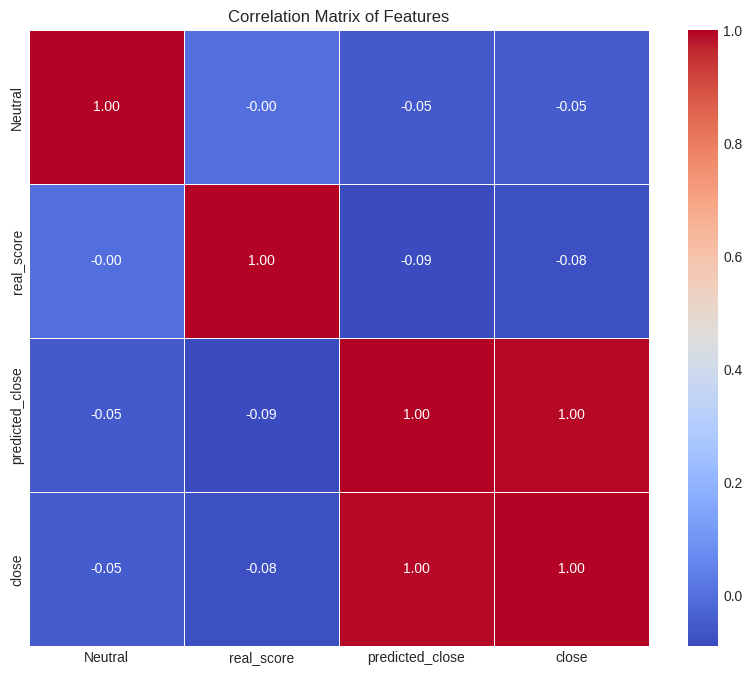

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = new_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [258]:
train_X = train_data.iloc[:, :-1]
train_y = train_data.iloc[:,-1]
train_X

,Neutral,real_score,predicted_close
0,0.149664,0.334356,0.863398
1,0.444781,0.464602,0.865692
2,0.283688,0.234399,0.866235
3,0.154378,0.835006,0.867351
4,0.037620,0.980434,0.874992
...,...,...,...
468,0.015061,0.988158,0.518495
469,0.021012,0.998670,0.506897
470,0.012192,0.989490,0.508094
471,0.018751,0.997692,0.511781


In [259]:
print(train_X.shape)
print(train_y.shape)
print(train_X.info())

(473, 3)
(473,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 0 to 472
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Neutral          473 non-null    float64
 1   real_score       473 non-null    float64
 2   predicted_close  473 non-null    float64
dtypes: float64(3)
memory usage: 14.8 KB
None


In [260]:
test_X = test_data.iloc[:, :-1]
test_y = test_data.iloc[:,-1]
test_X

,Neutral,real_score,predicted_close
473,0.168042,0.913158,0.523898
474,0.022939,0.992099,0.527262
475,0.006755,0.020655,0.532425
476,0.857898,0.568276,0.592297
477,0.019010,0.999118,0.616902
...,...,...,...
587,0.009494,0.001259,0.629855
588,0.032501,0.988582,0.649702
589,0.008681,0.000000,0.649685
590,0.018608,0.137392,0.646786


Epoch 1/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1847 - val_loss: 0.2333
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1304 - val_loss: 0.1567
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0960 - val_loss: 0.1052
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0767 - val_loss: 0.0692
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0647 - val_loss: 0.0485
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0573 - val_loss: 0.0357
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0328
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0461 - val_loss: 0.0320
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0405 - val_loss: 0.0288
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0349 - val_loss: 0.0267
Epoch 11/

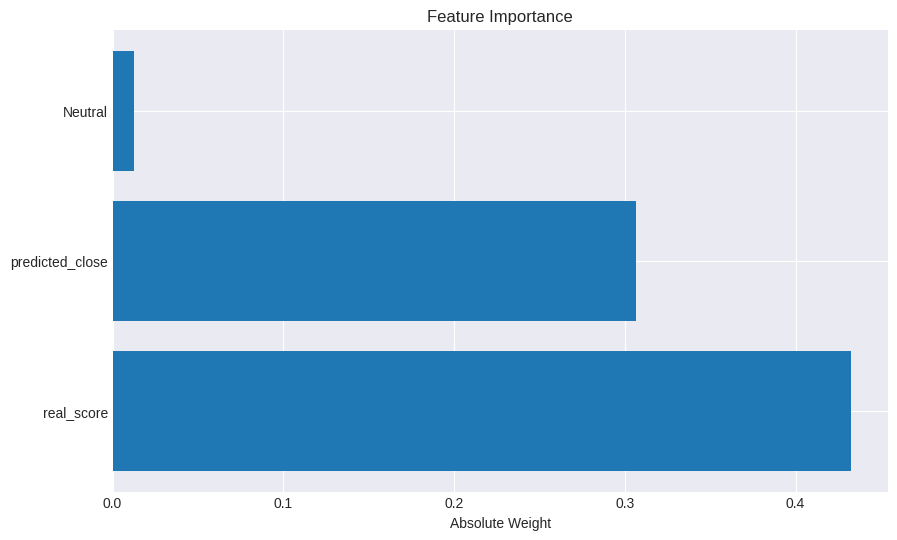

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Assuming train_X and train_y are your feature matrix and target variable
# Convert DataFrame to NumPy arrays

# Build the perceptron model
model = Sequential()

# Input layer with 7 neurons (features)
model.add(Dense(units=3, input_dim=3, activation='relu'))

# Hidden layers with 8 neurons each
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=8, activation='relu'))

# Output layer with 1 neuron for regression
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_X.values, train_y.values, epochs=100, batch_size=32, validation_data=(test_X, test_y))

# Extract weights from the first layer
weights_input_hidden = model.layers[0].get_weights()[0]

# Check if the number of feature names is equal to the number of weights
if len(train_X.columns) == len(weights_input_hidden[0]):
    # Create a DataFrame with feature names and corresponding weights
    feature_names = train_X.columns
    feature_weights = pd.DataFrame({'Feature': feature_names, 'Weight': weights_input_hidden[0]})
    
    # Sort features by absolute weights
    feature_weights['Absolute_Weight'] = np.abs(feature_weights['Weight'])
    sorted_features = feature_weights.sort_values(by='Absolute_Weight', ascending=False)

    # Plot the feature weights
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features['Feature'], sorted_features['Absolute_Weight'])
    plt.title('Feature Importance')
    plt.xlabel('Absolute Weight')
    plt.show()
else:
    print("Number of feature names doesn't match the number of weights.")


In [269]:
# Evaluate the model on the test set
normalized_predictions = model.predict(test_X)

original_predictions = scaler.inverse_transform(np.concatenate((test_X, normalized_predictions), axis=1))[:, -1]

# Calculate Mean Squared Error on the original scale
mse = mean_squared_error(scaler.inverse_transform(test_data)[:,-1], original_predictions)
print(f'Mean Squared Error on Test Set: {mse}')


4/4 [==============================] - 0s 1ms/step
Mean Squared Error on Test Set: 33.20791620754143


In [270]:

# Make predictions
predictions = model.predict(test_X.values)

# Optionally, you can use the predictions for further analysis
# For example, you can create a DataFrame with the actual and predicted values
results = pd.DataFrame({'Actual': test_y.values, 'Predicted': predictions.flatten()})
print(results)


4/4 [==============================] - 0s 897us/step
       Actual  Predicted
0    0.511884   0.519913
1    0.516428   0.526993
2    0.579867   0.503373
3    0.583712   0.569922
4    0.583957   0.604305
..        ...        ...
114  0.604893   0.586525
115  0.607410   0.632017
116  0.604649   0.603545
117  0.608913   0.604921
118  0.609367   0.627319

[119 rows x 2 columns]


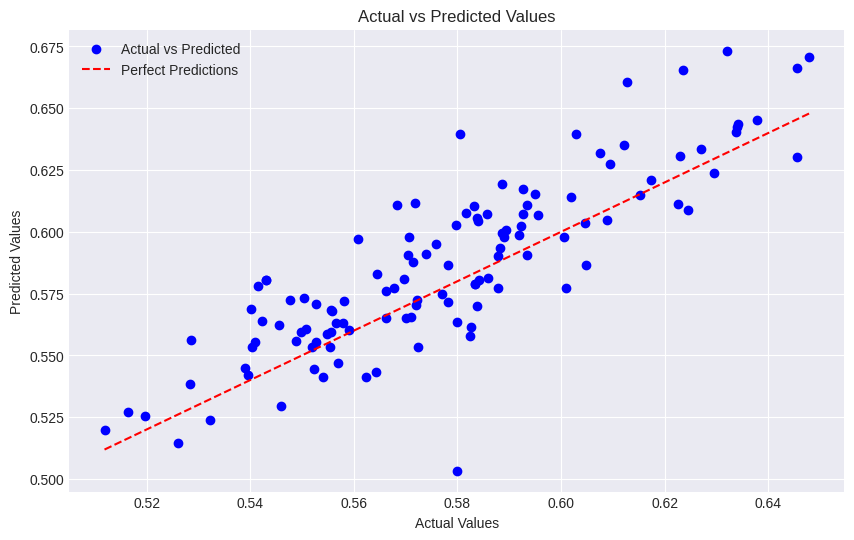

In [271]:
import matplotlib.pyplot as plt

# Assuming 'results' DataFrame is available
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted values
plt.scatter(results['Actual'], results['Predicted'], color='blue', label='Actual vs Predicted')

# Diagonal line for perfect predictions
plt.plot([results['Actual'].min(), results['Actual'].max()], [results['Actual'].min(), results['Actual'].max()], linestyle='--', color='red', label='Perfect Predictions')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


In [272]:
results['Predicted']

0      0.519913
1      0.526993
2      0.503373
3      0.569922
4      0.604305
         ...   
114    0.586525
115    0.632017
116    0.603545
117    0.604921
118    0.627319
Name: Predicted, Length: 119, dtype: float32

In [266]:
results['Actual']

0      0.511884
1      0.516428
2      0.579867
3      0.583712
4      0.583957
         ...   
114    0.604893
115    0.607410
116    0.604649
117    0.608913
118    0.609367
Name: Actual, Length: 119, dtype: float64

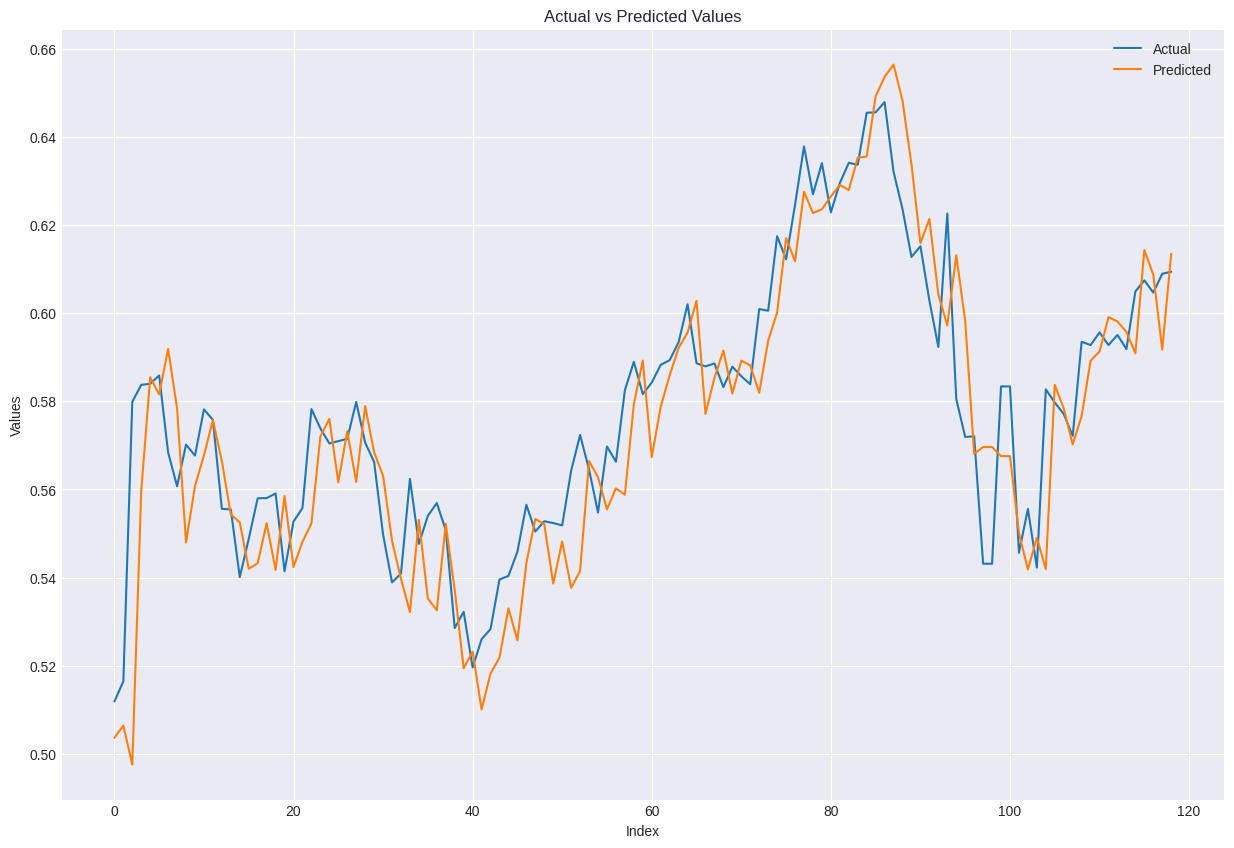

In [267]:
import matplotlib.pyplot as plt

# Assuming 'results' DataFrame is available
plt.figure(figsize=(15, 10))

plt.plot(range(len(results['Actual'])), results['Actual'], label='Actual')
plt.plot(range(len(results['Predicted'])), results['Predicted'], label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()
